<a href="https://colab.research.google.com/github/violinzfa/CMSC320-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# getting the data

jan = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=1")[0]
feb = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=2")[0]
mar = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=3")[0]
apr = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=4")[0]
may = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=5")[0]
jun = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=6")[0]
aug = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=8")[0]
sep = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=9")[0]
oct = pd.read_html("http://www.umpd.umd.edu/stats/csa_logs.cfm?year=2022&month=10")[0]

safety = pd.read_html("http://www.umpd.umd.edu/stats/safety_notices_umpd.cfm?year=22")[0]

jan.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
feb.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
mar.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
apr.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
may.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
jun.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
aug.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
sep.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
oct.columns = ["case #", "date time", "report date", "classification", "disposition", "loc"]
safety.columns = ["report date", "classification", "case #"]
safety["date time"] = safety["report date"]
safety["disposition"] = np.nan
safety["loc"] = np.nan

In [8]:
safety["classification"] = safety["classification"].apply(lambda x : x.partition("**UPDATE**")[0])
safety["loc"] = ["Ellicott Hall", "Regents Drive at Campus Drive", \
                 "Annapolis Hall", \
                 "Rudy's Cafe at Van Munching Hall", \
                 "Between Wind Tunnel Building (Paint Branch Drive) & College Park Metro", \
                 "Exterior of School of Public Health Building (4200 Valley Drive)", \
                 "Allegany Hall", \
                 "4300 block of Rowalt Drive", \
                 "Stamp Student Union, Second Floor"]
safety.loc[0, "classification"] = "Voyeur Incident"
safety.loc[6, "disposition"] = "Unfounded"
safety.loc[7, "classification"] = "Voyeur Incident"
safety.loc[8, "disposition"] = "Unfounded"
safety.head(9)

,report date,classification,case #,date time,disposition,loc
0,12/10/22,Voyeur Incident,2022-96454,12/10/22,NaN,Ellicott Hall
1,11/21/22,Indecent Exposure,2022-90037,11/21/22,NaN,Regents Drive at Campus Drive
2,10/31/22,Robbery (No Weapon),2022-83336,10/31/22,NaN,Annapolis Hall
3,10/05/22,Indecent Exposure,2022-74429,10/05/22,NaN,Rudy's Cafe at Van Munching Hall
4,09/02/22,Indecent Exposure,2022-65091,09/02/22,NaN,Between Wind Tunnel Building (Paint Branch Dri...
5,08/22/22,Indecent Exposure,2022-61917,08/22/22,NaN,Exterior of School of Public Health Building (...
6,04/27/22,Indecent Exposure,2022-30126,04/27/22,Unfounded,Allegany Hall
7,04/25/22,Voyeur Incident,2022-29646,04/25/22,NaN,4300 block of Rowalt Drive
8,04/10/22,Indecent Exposure,2022-25416,04/10/22,Unfounded,"Stamp Student Union, Second Floor"


In [9]:
# joining the monthly data into one dataframe

data = pd.concat([jan, feb, mar, apr, may, jun, aug, sep, oct], axis = 0)

In [10]:
# setting the locations

for row in data.iterrows():
  if row[1].name % 2 == 0:
    row[1].loc = data.iloc[row[1].name - 1]["loc"]

# putting the rows with data into new dataframe
crime = pd.DataFrame([], columns = ["case #", "date time", "report date", "classification", "disposition", "loc"])

for row in data.iterrows():
  if row[1].name % 2 == 0:
    crime.loc[len(crime.index)] = row[1]

crime = pd.concat([crime, safety], axis = 0)
crime = crime.reset_index()

In [11]:
crime = crime.drop(["case #", "index"], axis = 1) # dropping column with nearly no info
crime.tail(15) # 214 data points

,date time,report date,classification,disposition,loc
201,10/1/22 1:03 PM,11/10/22,Alcohol Violation,Judicial Referral,Hagerstown Hall
202,10/21/22 12:15 AM,11/10/22,Noise Violation,Judicial Referral,Hagerstown Hall
203,10/8/22 11:00 PM,11/10/22,Suspicious Activity,Judicial Referral,LaPlata Hall
204,10/14/22 9:45 AM,11/10/22,Burglary,Judicial Referral,LaPlata Hall
205,10/31/22 Unknown,11/30/22,Rape,CSA Under Confidentiality,8200 Blk Baltimore Avenue
206,10/7/22 Unknown,12/6/22,Rape,CSA Under Confidentiality,Prince Frederick Hall
207,12/10/22,12/10/22,Voyeur Incident,NaN,Ellicott Hall
208,11/21/22,11/21/22,Indecent Exposure,NaN,Regents Drive at Campus Drive
209,10/31/22,10/31/22,Robbery (No Weapon),NaN,Annapolis Hall
210,10/05/22,10/05/22,Indecent Exposure,NaN,Rudy's Cafe at Van Munching Hall


In [12]:
# parsing the dates and times

crime["date_time"] = crime["date time"].apply(lambda x : re.split("^(\d+)\/(\d+)\/(\d+)( (\d+):(\d+)\s*(AM|PM|am|pm)| (Unknown)| (Evening)|)$", x))
crime["report_date"] = crime["report date"].apply(lambda x : re.split("^(\d+)\/(\d+)\/(\d+)$", x))

In [13]:
# establishing dummy columns for preprocessing

crime["date"] = crime.index
crime["time"] = crime.index
crime["report"] = crime.index
crime.head()

,date time,report date,classification,disposition,loc,date_time,report_date,date,time,report
0,1/26/22 10:45 PM,2/15/22,Noise Violation,Judicial Referral,Denton Hall,"[, 1, 26, 22, 10:45 PM, 10, 45, PM, None, Non...","[, 2, 15, 22, ]",0,0,0
1,1/30/22 8:00 PM,2/15/22,Vandalism,Judicial Referral,Caroline Hall,"[, 1, 30, 22, 8:00 PM, 8, 00, PM, None, None, ]","[, 2, 15, 22, ]",1,1,1
2,1/29/22 12:15 PM,2/15/22,Vandalism,Judicial Referral,Denton Hall,"[, 1, 29, 22, 12:15 PM, 12, 15, PM, None, Non...","[, 2, 15, 22, ]",2,2,2
3,1/29/22 12:15 AM,2/15/22,Vandalism,Judicial Referral,Elkton Hall,"[, 1, 29, 22, 12:15 AM, 12, 15, AM, None, Non...","[, 2, 15, 22, ]",3,3,3
4,1/29/22 10:35 PM,2/15/22,Vandalism,Judicial Referral,Elkton Hall,"[, 1, 29, 22, 10:35 PM, 10, 35, PM, None, Non...","[, 2, 15, 22, ]",4,4,4


In [14]:
# getting date, time and report time into the new columns

for row in crime.iterrows():
  if row[1].date_time[0] == '':
    crime.loc[row[1].name, "date"] = dt.date((2022), int(row[1].date_time[1]), int(row[1].date_time[2]))
  else:
    crime.loc[row[1].name, "date"] = np.nan

  if len(row[1].date_time) > 1 and row[1].date_time[5] is not None:
    crime.loc[row[1].name, "time"] = dt.time(int(row[1].date_time[5]), int(row[1].date_time[6]), 0)
  else:
    crime.loc[row[1].name, "time"] = np.nan

  crime.loc[row[1].name, "report"] = dt.date((2000 + int(row[1].report_date[3])), int(row[1].report_date[1]), int(row[1].report_date[2]))

In [15]:
# dropping old columns from preprocessing

crime = crime.drop(["date time", "report date", "date_time", "report_date"], axis = 1)
crime.head()

,classification,disposition,loc,date,time,report
0,Noise Violation,Judicial Referral,Denton Hall,2022-01-26,10:45:00,2022-02-15
1,Vandalism,Judicial Referral,Caroline Hall,2022-01-30,08:00:00,2022-02-15
2,Vandalism,Judicial Referral,Denton Hall,2022-01-29,12:15:00,2022-02-15
3,Vandalism,Judicial Referral,Elkton Hall,2022-01-29,12:15:00,2022-02-15
4,Vandalism,Judicial Referral,Elkton Hall,2022-01-29,10:35:00,2022-02-15


Text(0.5, 1.0, 'UMD Incident Types and Frequency in 2022')

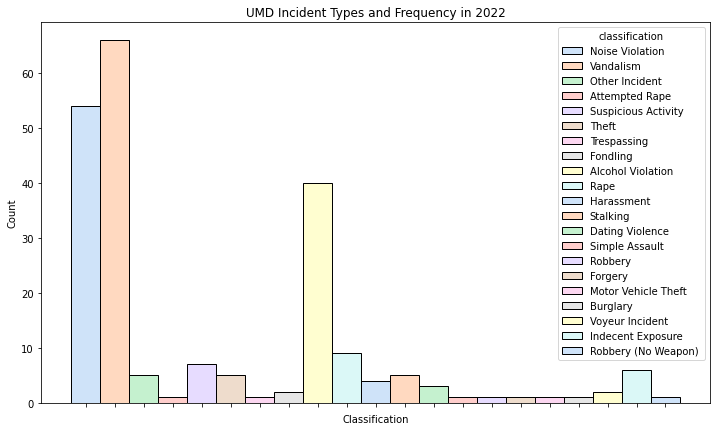

In [16]:
#plotting frequency of incidents

plt.figure(figsize=(12, 7))
sns.histplot(data = crime, x = "classification", hue = "classification", palette = "pastel")

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.xlabel("Classification")
plt.title("UMD Incident Types and Frequency in 2022")

Text(0.5, 1.0, 'UMD Incident Location and Frequency in 2022')

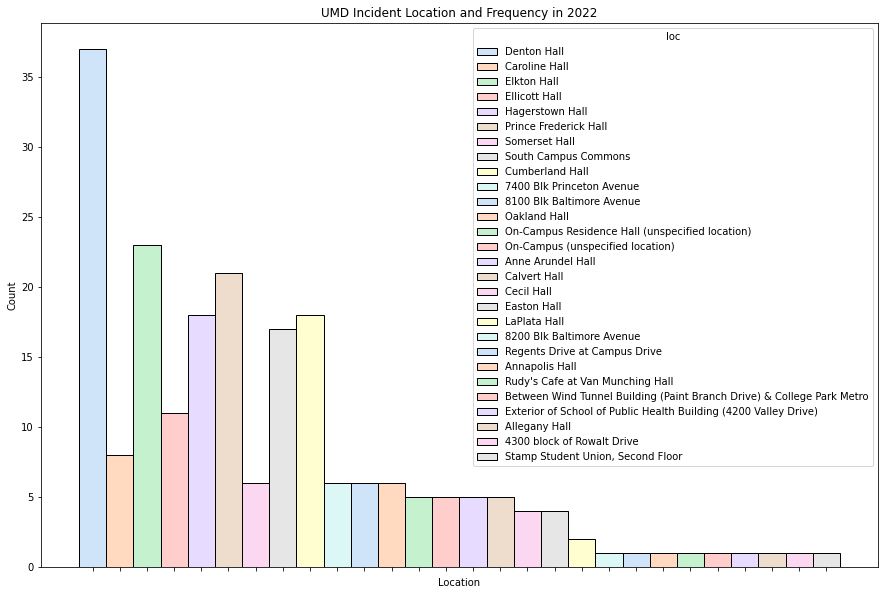

In [17]:
# plotting frequency of locations with incidents

plt.figure(figsize=(15, 10))
sns.histplot(data = crime, x = "loc", hue = "loc", palette = "pastel")

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.xlabel("Location")
plt.title("UMD Incident Location and Frequency in 2022")

Text(0.5, 1.0, 'UMD Incidents at Denton Hall and Frequency in 2022')

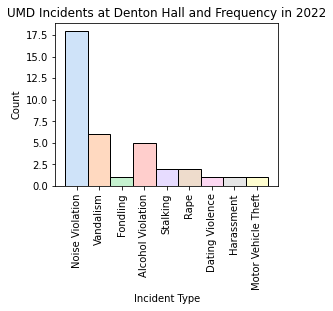

In [18]:
# plotting indecent exposure locations

plt.figure(figsize=(4, 3))
sns.histplot(data = crime[crime["loc"] == "Denton Hall"], x = "classification", hue = "classification", palette = "pastel")

frame1 = plt.gca()
frame1.tick_params(axis='x', rotation=90)
plt.legend([],[], frameon=False)
plt.xlabel("Incident Type")
plt.title("UMD Incidents at Denton Hall and Frequency in 2022")

Text(0.5, 1.0, 'UMD Incidents in 2022')

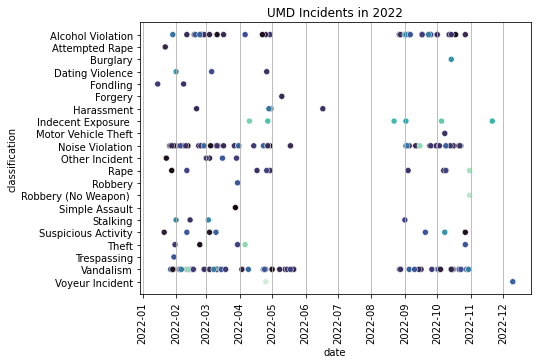

In [19]:
plt.figure(figsize=(7, 5))

sns.scatterplot(data=crime.sort_values("classification"), y="classification", x="date", hue="loc", palette="mako")

frame1 = plt.gca()
frame1.tick_params(axis='x', rotation=90)
plt.legend([],[], frameon=False)
plt.grid(axis="x")
#plt.xlabel("Incident Type")
plt.title("UMD Incidents in 2022")

In [20]:
crime.sort_values("date").tail()

,classification,disposition,loc,date,time,report
209,Robbery (No Weapon),NaN,Annapolis Hall,2022-10-31,NaN,2022-10-31
205,Rape,CSA Under Confidentiality,8200 Blk Baltimore Avenue,2022-10-31,NaN,2022-11-30
208,Indecent Exposure,NaN,Regents Drive at Campus Drive,2022-11-21,NaN,2022-11-21
207,Voyeur Incident,NaN,Ellicott Hall,2022-12-10,NaN,2022-12-10
55,Stalking,CSA Under Confidentiality,Denton Hall,NaN,NaN,2022-03-11


In [21]:
crime["classification"].unique()

array(['Noise Violation', 'Vandalism', 'Other Incident', 'Attempted Rape',
       'Suspicious Activity', 'Theft', 'Trespassing', 'Fondling',
       'Alcohol Violation', 'Rape', 'Harassment', 'Stalking',
       'Dating Violence', 'Simple Assault', 'Robbery', 'Forgery',
       'Motor Vehicle Theft', 'Burglary', 'Voyeur Incident',
       'Indecent Exposure ', 'Robbery (No Weapon) '], dtype=object)